<h1 style="text-align:center;">CORDIC算法计算三角函数以及 verilog 代码实现</h1>

# CORDIC 算法说明

## 概述

在一些缺乏浮点计算单元的硬件设备中，对于三角函数的计算，我们可以采用查表法，或者 CORDIC(Coordinate Roration Digital Computer) 算法。这里我们先通过 Python 代码进行浮点数运算来实现 cordic 算法求解三角函数，再使用硬件描述语言 verilog ，通过定点小数的方式来求解三角函数。

## 算法原理


<table style="text-align:center; font-size:15px;">
    <tr>
        <td><img src="./pictures/cordic.svg"><br> <strong>Fig1. 示意图</strong></td>
    </tr>
</table>

在单位圆上，Q点的横坐标和纵坐标就是角度 $cos\theta, sin\theta$ ，可以通过P点 $(x_{0}, y_{0}) = (1, 0)$ 来计算 Q 点的坐标，根据坐标旋转公式，我们有：

$$
\begin{array}{l}
    \left[
        \begin{array}{c}
            x_{target}\\
            y_{target}
        \end{array}
    \right]
    &=
    \left[
        \begin{array}{c}
            cos(\theta) & -sin(\theta)\\
            sin(\theta) & cos(\theta)
        \end{array}
    \right]
    \left[
        \begin{array}{c}
            x_{0}\\
            y_{0}
        \end{array}
    \right]
    \\
    &=
    cos\theta
    \left[
        \begin{array}{c}
            1 & -tan(\theta)\\
            tan(\theta) & 1
        \end{array}
    \right]
    \left[
        \begin{array}{c}
            x_{0}\\
            y_{0}
        \end{array}
    \right]    
\end{array}
\tag{1}
$$

在单位圆上，Q点的横坐标和纵坐标就是角度 $cos\theta, sin\theta$ ，可以通过P点 $(x_{0}, y_{0}) = (1, 0)$ 来计算 Q 点的坐标，根据坐标旋转公式，我们有：

$$
\begin{array}{l}
    \left[
        \begin{array}{c}
            x_{target}\\
            y_{target}
        \end{array}
    \right]
    &=
    \left[
        \begin{array}{c}
            cos(\theta) & -sin(\theta)\\
            sin(\theta) & cos(\theta)
        \end{array}
    \right]
    \left[
        \begin{array}{c}
            x_{0}\\
            y_{0}
        \end{array}
    \right]
    \\
    &=
    cos\theta
    \left[
        \begin{array}{c}
            1 & -tan(\theta)\\
            tan(\theta) & 1
        \end{array}
    \right]
    \left[
        \begin{array}{c}
            x_{0}\\
            y_{0}
        \end{array}
    \right]    
\end{array}
\tag{1}
$$

在第一象限，$cos\theta$ 可以写成 $\sqrt{ \frac{(cos\theta)^2}{(cos\theta)^2 + (sin\theta)^2} }$，我们有：

$$
\begin{array}{l}
    \left[
        \begin{array}{c}
            x_{target}\\
            y_{target}
        \end{array}
    \right]
    &=
    \sqrt{\frac{{cos\theta}^2}{{sin\theta}^2 + {cos\theta}^2}}
    \left[
        \begin{array}{c}
            1 & -tan(\theta)\\
            tan(\theta) & 1
        \end{array}
    \right]
    \left[
        \begin{array}{c}
            x_{0}\\
            y_{0}
        \end{array}
    \right]  
    \\
    &=
    \sqrt{\frac{1}{1 + {tan\theta}^2}}
    \left[
        \begin{array}{c}
            1 & -tan(\theta)\\
            tan(\theta) & 1
        \end{array}
    \right]
    \left[
        \begin{array}{c}
            x_{0}\\
            y_{0}
        \end{array}
    \right]      
\end{array}
\tag{2}
$$

这样，整体看起来就只有 $tan(\theta)$ 这一个未知参数而已了，而且如果我们让 $\theta$ 角的取值正好使得 $tan(\theta) = \frac{1}{2^i}$，那么矩阵的乘法运算，其实也就只是移位而已，系数 $\frac{1}{1 + {tan\theta}^2}$ 的乘法问题我们后面有其他的办法来解决。


如此一来，我们可以让 $\theta$ 通过 n 个特定的角度组合而来，即：

$$
\theta =  d_0\times \theta_0  + d_1\times \theta_1 + d_2\times \theta_2 + \cdots + d_{n-1}\times \theta_{n-1}
\tag{3}
$$

其中 $d_i$ 取值为 $\pm 1$， 表示第 i 个角度 $\theta_i$ 的旋转的方向(d 就理解为 direction就好)，比如当n=8时， 我们可以选择这样的$ \theta_i $ ：


|  $\diagdown$ | $i=0$ | $i=1$ | $i=2$ | $ i=3 $ | $ i=4 $ | $ i=5 $ | $ i=6 $ | $ i=7 $ |
| ------ | --- | --- | --- |--- | --- | --- |--- | --- | 
| tan($\theta$) | $2^0$ | $2^{-1}$ | $2^{-2}$ | $2^{-3}$ | $2^{-4}$ | $2^{-5}$ | $2^{-6}$ | $2^{-7}$ |
| $\theta$(rad) | 0.7854  | 0.4636  | 0.2450  | 0.1244  | 0.0624  | 0.0312  | 0.0156  | 0.0078  | 
| $\theta$(角度) | 45.0000 ° | 26.5651 ° | 14.0362 ° | 7.1250 ° | 3.5763 ° | 1.7899 ° | 0.8952 ° | 0.4476 ° | 

这样，公式 (2) 可以写成这样：

$$
\begin{array}{l}
    \left[
        \begin{array}{c}
            x_{target}\\
            y_{target}
        \end{array}
    \right]
    &=
    K(n)
    \left[
        \begin{array}{c}
            1 & -tan(d_0\theta_0)\\
            tan(d_0\theta_0) & 1
        \end{array}
    \right]    
    \left[
        \begin{array}{c}
            1 & -tan(d_1\theta_1)\\
            tan(d_1\theta_1) & 1
        \end{array}
    \right]      
    \cdots
    \left[
        \begin{array}{c}
            1 & -tan(d_n\theta_n)\\
            tan(d_n\theta_n) & 1
        \end{array}
    \right]    
    \left[
        \begin{array}{c}
            x_{0}\\
            y_{0}
        \end{array}
    \right]      
\end{array}
\tag{4}
$$

其中：

$$
K(n) = \prod_{i=0}^{n-1}\sqrt{\frac{1}{1 + {(tan (d_i\theta_i)})^2}}
$$

当 n $\rightarrow \infty$ 时，

$$
K(n) = \prod_{i=0}^{n}\sqrt{\frac{1}{1 + (\frac{1}{2^i})^2}} \approx 0.6072529350088814,\; n\rightarrow \infty
$$

可以用下面的 python 代码进行验证一下：

In [2]:
K = 1 # 初始值
N = 100 # 计算100个
for i in range(N):
    K = K*(1/(1 + pow(2, -2*i)))**0.5 #累乘
print(f'当 N = {N} 时，K={K}')

当 N = 100 时，K=0.6072529350088814


如此一来，我们可以把 K(n) 合并到 $(x_0, y_0) = (0, 1)$ 中，公式 (4) 可以进一步写成：

$$
\begin{array}{l}
    \left[
        \begin{array}{c}
            x_{target}\\
            y_{target}
        \end{array}
    \right]
    &=
    \left[
        \begin{array}{c}
            1 & -tan(d_0\theta_0)\\
            tan(d_0\theta_0) & 1
        \end{array}
    \right]    
    \left[
        \begin{array}{c}
            1 & -tan(d_1\theta_1)\\
            tan(d_1\theta_1) & 1
        \end{array}
    \right]      
    \times \cdots \times
    \left[
        \begin{array}{c}
            1 & -tan(d_n\theta_n)\\
            tan(d_n\theta_n) & 1
        \end{array}
    \right]    
    \left[
        \begin{array}{c}
            0.607252935\\
            0
        \end{array}
    \right]      
\end{array}
\tag{5}
$$

当然，用所选定的 n 个 $\theta_0,\cdots,\theta_{n-1}$，能够表达的范围也是有限度的，当 n $\rightarrow \infty$ 这种方法所能够求解的三角函数的范围是：$[-99.88296583468959°, 99.88296583468959°]$

同样地，可以用下面的 python 代码来验证

In [3]:
import numpy as np
N = 100
theta = [ np.arctan(pow(2, -i))for i in range(N)] # 利用 arctan 函数求角度
theta_degree = [th/np.pi*180 for th in theta]     # 把弧度变为角度

print(f'当 N = {N}, 时，最大能表示的角度为：{sum(theta_degree)}°')

当 N = 100, 时，最大能表示的角度为：99.8829658346896°


# 使用 python 代码来进行 cordic 算法的验证

为加深理解，我们先通过 python 代码来实现一遍浮点数下的 cordic 算法，首先使用浮点数，来实现，然后再在 python 下使用定点数来再实现一遍，最后在 `verilog` 代码中也可以按照这个思路来完成



## 使用浮点数

In [5]:
import numpy as np
import matplotlib.pyplot as plt

'''
    函数作用：
        通过 cordic 算法计算三角函数 cos，sin
        
    输入参数:
        target——需要计算三角函数的角度
        depth——迭代次数
    返回参数：
        cos(theta)——余弦值
        sin(theta)——正弦值
'''
def cordic(target, depth = 8):
    """使用 cordic 算法计算 cos()、sin()"""
    quard_idx = 0           # 计算 target 所处的坐标
    neg_flag = (target < 0) # target 是负数的标记
    if target < 0:
        target = -target;
    
    # 把 target 变到第一象限
    if target > np.pi/2:
        while target > np.pi/2:
            target -= np.pi/2
            quard_idx = (quard_idx + 1) % 4
    
    th_approx = 0 # 用于逼近 theta 的估计值
    K = 0.6072529350088814
    x0 = K
    y0 = 0
    x1 = x0 # x1 表示下一步的 x0 值
    y1 = y0 # y1 表示下一步的 y0 值
    # 进行迭代计算
    for i in range(depth):
        d = ((target > th_approx)*2 - 1) #方向，1, -1，取值
        th_approx += d*np.arctan(pow(2,-i)) # 加上第 i 个角度，这个其实可以提前算好，然后直接查表加上即可
        x1 -= d*(y0 /(2**i))   # 更新参数，可以通过参数来实现
        y1 += d*(x0 /(2**i))
        x0 = x1
        y0 = y1
    
    # 根据原有的象限，返回计算结果，如果 target 是负数，我们要在 y 轴承一个符号
    if 1 == quard_idx: # 第 2 象限
        return -y0, x0*(1-neg_flag*2)
    elif 2 == quard_idx: # 第 3 象限
        return -x0, -y0*(1-neg_flag*2)
    elif 3 == quard_idx: # 第 4 象限
        return y0, -x0*(1-neg_flag*2)
    else: #第 1 象限
        return x0, y0*(1-neg_flag*2)

### 结果展示

我们画图看看使用 np.cos 和 np.sin 计算的结果，和 cordic 计算的结果的对比，从图片结果来看（cordic 算法迭代次数选为12），二者还是挺接近的。

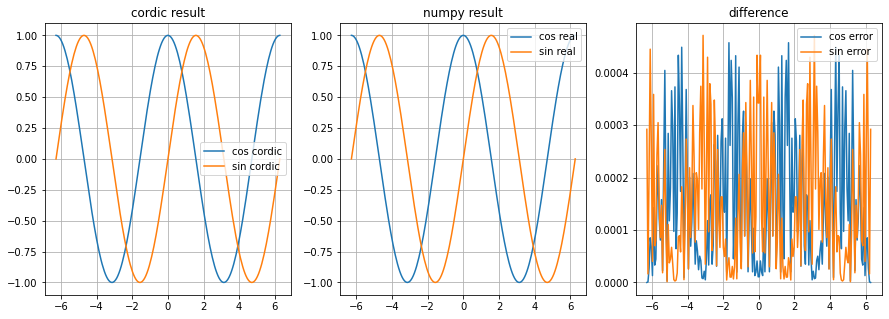

In [15]:
theta = np.linspace(-2*np.pi, 2*np.pi,200)
cordic_theta = np.array([cordic(th, 12) for th in theta]) # 计算各个角度的 cordic 计算的结果，迭代次数为 12

cos_real = np.cos(theta) # 真实的 cos 值
sin_real = np.sin(theta) # 真实的 sin 值

x = [theta, theta, theta]
y = [[cordic_theta[:,0], cordic_theta[:,1]],[cos_real, sin_real],[abs(cordic_theta[:,0]-cos_real),abs(cordic_theta[:,1]-sin_real)]]
labels = [['cos cordic', 'sin cordic'], ['cos real', 'sin real'], ['cos error','sin error']]
titles = ['cordic result', 'numpy result', 'difference']

fig, ax = plt.subplots(1,3,figsize=(15,5))
for i in range(3):
    ax[i].plot(x[i], y[i][0], label=labels[i][0])
    ax[i].plot(x[i], y[i][1], label=labels[i][1])
    ax[i].grid('on')
    ax[i].set_title(titles[i])
    ax[i].legend()
    

## 使用定点数

前面我们使用浮点数计算了三角函数，现在我们通过 python 模拟在硬件电路里面怎么样来进行 cordic 算法。主要的区别在于定点小数的运算过程，以及如何将浮点数转换为定点数。而且还需要考虑补码、符号位这些东西，要繁琐一些。我们先定义一些浮点数和定点数之间的转换函数

In [16]:
def fixEncodeNum(n, n_int=8, n_frac = 8):
    """将浮点数 n 转换为定点数表示，n_int 是整数部分的位宽，n_frac是小数部分的位宽"""
    bit_width = n_int +n_frac
    mask = sum([1 << i for i in range(bit_width)]) # 0'b1111...11
    # 缩放尺度
    scale = 2**n_frac
    res = int(n*scale)
    if res < 0: # 如果是负数，还需要变成对应正数的补码
        res = (1 << bit_width) - abs(res)
    return res

def fixDecodeNum(n, n_int=8, n_frac = 8):
    """将定点数数 n 还原成浮点数表示"""
    bit_width = n_int +n_frac
    mask = sum([1 << i for i in range(bit_width)]) 
    scale = 2**n_frac
    # 正数的转换操作
    if n < (1 << (bit_width - 1)):
        return n / scale
    
    # 负数的转换操作
    n = (1 << bit_width) - n
    return -n/scale

def fix(n, n_int=8, n_frac = 8):
    """经过定点变换后再变回原来的浮点数，主要对比精度损失"""
    return int(n*2**n_frac) / 2**n_frac

def rshift(num, n, n_int, n_frac):
    """对定点小数进行右移位，右移时，需要在高位补充符号位"""
    bit_width = n_int +n_frac
    mask = sum([1 << i for i in range(bit_width)]) 
    if num < (1 << (bit_width-1)):#正数直接移位就行
        return num >> n
    if n >= bit_width:
        raise ValueError("移位过长")
    num = (1 << bit_width) - num # 如果是负数，我这里的操作是先变成正数，再移位，再变回负数（直接移位再在高位补符号位应该也可以，但二者会有差别）
    num = (num >> n)
    return (1 << bit_width) - num

def fixSub(a, b, n_int=8, n_frac = 8):
    """定点小数减法，减去一个数，等于加上这个数的补码"""
    bit_width = n_int +n_frac
    mask = sum([1 << i for i in range(bit_width)])   
    return (a + ( (1 << bit_width) - b )) & mask


下面，我们先使用上面的函数，来看看一些常见参数的定点数表达，这里我们可以对比一下下面两种情况的精度：

- **n_int = 8, n_frac = 8**


In [48]:
n_int = 8
n_frac = 8
theta_ref = [ np.arctan(pow(2, -i)) for i in range(12)]
theta_ref_fix_unsign = [ fixEncodeNum(th, n_int, n_frac) for th in theta_ref]
theta_ref_fix = [ fix(th, n_int, n_frac) for th in theta_ref]
print(f'n_int={n_int}, n_frac={n_frac}时：\n真实 K\t\t：{K}')
print(f'定点K无符号数\t: {fixEncodeNum(K, n_int, n_frac)}')
print(f'定点K二进制\t: {bin(fixEncodeNum(K, n_int, n_frac))}')
print(f'小数K\t\t：{fix(K, n_int, n_frac)}')

print('ref角度真实值\t:', theta_ref)
print('ref角度定点无符号\t:', theta_ref_fix_unsign)
print('ref角度定点值\t:', theta_ref_fix)
print(64*"-")


n_int=8, n_frac=8时：
真实 K		：0.6072529350088814
定点K无符号数	: 155
定点K二进制	: 0b10011011
小数K		：0.60546875
ref角度真实值	: [0.7853981633974483, 0.4636476090008061, 0.24497866312686414, 0.12435499454676144, 0.06241880999595735, 0.031239833430268277, 0.015623728620476831, 0.007812341060101111, 0.0039062301319669718, 0.0019531225164788188, 0.0009765621895593195, 0.0004882812111948983]
ref角度定点无符号	: [201, 118, 62, 31, 15, 7, 3, 1, 0, 0, 0, 0]
ref角度定点值	: [0.78515625, 0.4609375, 0.2421875, 0.12109375, 0.05859375, 0.02734375, 0.01171875, 0.00390625, 0.0, 0.0, 0.0, 0.0]
----------------------------------------------------------------


- **n_int = 4, n_frac = 12**

In [47]:
n_int = 4
n_frac = 12
theta_ref = [ np.arctan(pow(2, -i)) for i in range(12)]
theta_ref_fix_unsign = [ fixEncodeNum(th, n_int, n_frac) for th in theta_ref]
theta_ref_fix = [ fix(th, n_int, n_frac) for th in theta_ref]
print(f'n_int={n_int}, n_frac={n_frac}时：\n真实 K\t\t：{K}')
print(f'定点K无符号数\t: {fixEncodeNum(K, n_int, n_frac)}')
print(f'定点K二进制\t: {bin(fixEncodeNum(K, n_int, n_frac))}')
print(f'小数K\t\t：{fix(K, n_int, n_frac)}')

print('ref角度真实值\t:', theta_ref)
print('ref角度定点无符号\t:', theta_ref_fix_unsign)
print('ref角度定点值\t:', theta_ref_fix)
print(64*"-")


n_int=4, n_frac=12时：
真实 K		：0.6072529350088814
定点K无符号数	: 2487
定点K二进制	: 0b100110110111
小数K		：0.607177734375
ref角度真实值	: [0.7853981633974483, 0.4636476090008061, 0.24497866312686414, 0.12435499454676144, 0.06241880999595735, 0.031239833430268277, 0.015623728620476831, 0.007812341060101111, 0.0039062301319669718, 0.0019531225164788188, 0.0009765621895593195, 0.0004882812111948983]
ref角度定点无符号	: [3216, 1899, 1003, 509, 255, 127, 63, 31, 15, 7, 3, 1]
ref角度定点值	: [0.78515625, 0.463623046875, 0.244873046875, 0.124267578125, 0.062255859375, 0.031005859375, 0.015380859375, 0.007568359375, 0.003662109375, 0.001708984375, 0.000732421875, 0.000244140625]
----------------------------------------------------------------


<br><br>

可以看到，n_frac 位宽越高，对原来浮点数的逼近程度就越高。下面我们来正式定义在定点小数下的 cordic 算法

In [17]:
'''
    函数作用：
        通过 cordic 算法计算三角函数 cos，sin，在定点数下进行计算
        
    输入参数:
        target——需要计算三角函数的角度
        n_int——整数位宽
        n_frac——小数位宽
        depth——迭代次数
    返回参数：
        x0——余弦值
        y0——正弦值
'''
def cordic_fix(target, n_int=4, n_frac=12, depth=12):
    """使用定点小数来计算三角函数, depth 表示迭代次数"""
    bit_width = n_int + n_frac
    bitmax = 1 << bit_width
    mask = sum([1 << i for i in range(bit_width)])
    # 判断 target 的正负形
    neg_flag = (target > (1 <<(bit_width - 1)))
    
    # 如果是负数，就先转换成正数来进行计算
    if neg_flag:
        target = (((1 << bit_width) - target) & mask)
    pi_half = fixEncodeNum(np.pi/2, n_int, n_frac)
    
    # 换到第一象限
    quard_idx = 0 # 0~3，对应4个象限
    while target > pi_half:
        quard_idx = (quard_idx + 1) % 4
        target -= pi_half

    x0 = fixEncodeNum(0.6072529350088814, n_int, n_frac)
    y0 = 0
    x1 = x0
    y1 = x0
    th_approx = 0
    for i in range(depth):
        # 方向
        diff = fixSub(target, th_approx, n_int, n_frac)
        d = (diff < (1 << (bit_width-1)))*2 - 1
        #  中间变量，移位后的 x0，y0
        x0_rshift = rshift(x0, i, n_int, n_frac)
        y0_rshift = rshift(y0, i, n_int, n_frac)
        # 更新
        delta = fixEncodeNum(np.arctan(2**(-i)), n_int, n_frac)
        if 1 == d:
            x1 = fixSub(x0, y0_rshift, n_int, n_frac)
            y1 = y0 + x0_rshift
            th_approx += delta
        else:
            x1 = x0 + y0_rshift
            y1 = fixSub(y0, x0_rshift)
            th_approx = fixSub(th_approx, delta, n_int, n_frac)
        x0 = x1 & mask
        y0 = y1 & mask
        if th_approx +1 == target or th_approx == target +1 or th_approx == target: # 结束迭代的条件
            break        
    
    # 将计算结果返回
    if 1 == quard_idx: # 第 2 象限
        if neg_flag:
            return ((1<<bit_width)-y0), (1<<bit_width)-x0
        else:
            return ((1<<bit_width)-y0), x0
    elif 2 == quard_idx: # 第 3 象限
        if neg_flag:
            return ((1<<bit_width)-x0), y0
        else:
            return ((1<<bit_width)-x0), (1<<bit_width)-y0    
    elif 3 == quard_idx: # 第 4 象限
        if neg_flag:
            return y0, x0
        else:
            return y0, (1<<bit_width)-x0    
    else: #第 1 象限
        if neg_flag:
            return x0, (1<<bit_width)-y0
        else:
            return x0, y0

### 结果展示

下面我们来看看使用定点小数计算的结果与真实值之间的差别，这里我们用的参数是 ：`n_int = 4, n_frac = 12, deptp=12`

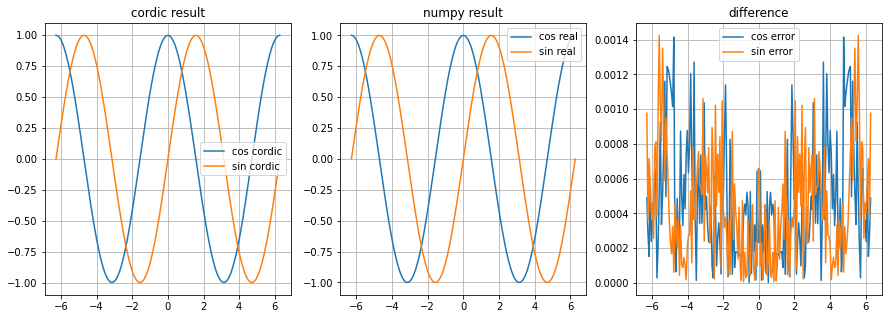

In [52]:
n_int = 4
n_frac = 12
depth = 12

theta = np.linspace(-2*np.pi, 2*np.pi,200)
cos_real = np.cos(theta) # 真实的 cos 值
sin_real = np.sin(theta) # 真实的 sin 值

# 使用定点数计算各个角度的 cos、sin 
cordic_theta = np.array([cordic_fix( fixEncodeNum(th, n_int, n_frac), n_int, n_frac, depth) for th in theta]) # 计算各个角度的 cordic 计算的结果，迭代次数为 12

# 因为 cordic_theta 仍然是用无符号数来表示的 cos、sin 值，我们需要将其转换为定点小数的形式
cordic_theta_cos_decode = [ fixDecodeNum(cos, n_int, n_frac) for cos in cordic_theta[:,0]]
cordic_theta_sin_decode = [ fixDecodeNum(sin, n_int, n_frac) for sin in cordic_theta[:,1]]

x = [theta, theta, theta]
y = [
        [cordic_theta_cos_decode, cordic_theta_sin_decode],
        [cos_real, sin_real],
        [abs(cordic_theta_cos_decode-cos_real),abs(cordic_theta_sin_decode-sin_real)]
    ]
labels = [['cos cordic', 'sin cordic'], ['cos real', 'sin real'], ['cos error','sin error']]
titles = ['cordic result', 'numpy result', 'difference']

fig, ax = plt.subplots(1,3,figsize=(15,5))
for i in range(3):
    ax[i].plot(x[i], y[i][0], label=labels[i][0])
    ax[i].plot(x[i], y[i][1], label=labels[i][1])
    ax[i].grid('on')
    ax[i].set_title(titles[i])
    ax[i].legend()
    

# 总结

本文档主要用 python 实现了在定点小数下的 cordic 算法，灵感来源参考知乎文章：

[CORDIC算法原理详解](https://zhuanlan.zhihu.com/p/384524393)
